# Simple state space model for 2pp voting intention

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Load-2pp-data-and-prepare-for-analysis" data-toc-modified-id="Load-2pp-data-and-prepare-for-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load 2pp data and prepare for analysis</a></span></li><li><span><a href="#The-model" data-toc-modified-id="The-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The model</a></span><ul class="toc-item"><li><span><a href="#Fit-data-to-model" data-toc-modified-id="Fit-data-to-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit data to model</a></span></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Plot-results" data-toc-modified-id="Plot-results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot results</a></span></li></ul></li></ul></div>

## Python setup

In [1]:
# Data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import arviz as az
import stan # install with pip - conda is problematic on the M1 MBP

# system imports
import pathlib

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR, COLOR_OTHER

In [2]:
# enable pystan on jupyter notebook
import nest_asyncio
nest_asyncio.apply()

In [3]:
# path to the model data
DATA_DIR = '../data'
pathlib.Path(DATA_DIR).mkdir(parents=True, exist_ok=True)
DATA_DIR += '/'

In [4]:
# plotting stuff
plt.style.use('./markgraph.mplstyle')
s_args = {'lfooter': 'Polling data from Wikipedia'}

## Load 2pp data and prepare for analysis

In [5]:
# read in 2pp data; remind me, what are the column names ...
tpp = pd.read_csv(f'{DATA_DIR}two_party_preferred.csv', parse_dates=['Mean Date'], index_col=0)
tpp.columns

Index(['2pp vote L/NP', '2pp vote ALP', 'Date', 'Mean Date', 'Brand',
       'Interview mode', 'Sample size', '2pp Vote L/NP LOWESS'],
      dtype='object')

In [6]:
# Number of polls
len(tpp)

96

## The model

### Fit data to model

In [7]:
# this step typically takes around 3 minutes
fit, first_day, brand_map = common.bayes_poll_aggregation(tpp, 
                              poll_column='2pp vote L/NP',
                              date_column='Mean Date',
                              firm_column='Brand',
                              assumed_sample_size=1000,
                              num_chains=4,
                              num_samples=2_500)

Building: found in cache, done.
Messages from stanc:
Sampling:   0%


Stan version: 3.3.0


Sampling:   0% (1/14000)
Sampling:   0% (2/14000)
Sampling:   0% (3/14000)
Sampling:   0% (4/14000)
Sampling:   1% (103/14000)
Sampling:   1% (202/14000)
Sampling:   2% (301/14000)
Sampling:   3% (400/14000)
Sampling:   4% (500/14000)
Sampling:   4% (600/14000)
Sampling:   5% (700/14000)
Sampling:   6% (800/14000)
Sampling:   6% (900/14000)
Sampling:   7% (1000/14000)
Sampling:   8% (1100/14000)
Sampling:   9% (1200/14000)
Sampling:   9% (1300/14000)
Sampling:  10% (1400/14000)
Sampling:  11% (1500/14000)
Sampling:  11% (1600/14000)
Sampling:  12% (1700/14000)
Sampling:  13% (1800/14000)
Sampling:  14% (1900/14000)
Sampling:  14% (2000/14000)
Sampling:  15% (2100/14000)
Sampling:  16% (2200/14000)
Sampling:  16% (2300/14000)
Sampling:  17% (2400/14000)
Sampling:  18% (2500/14000)
Sampling:  19% (2600/14000)
Sampling:  19% (2700/14000)
Sampling:  20% (2800/14000)
Sampling:  21% (2900/14000)
Sampling:  21% (3000/14000)
Sampling:  22% (3100/14000)
Sampling:  23% (3200/14000)
Sampling:  24

### Diagnostics

In [8]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
hidden_vote_share[0],51.606,0.972,49.759,53.379,0.011,0.008,7867.0,8820.0,1.0
hidden_vote_share[1],51.594,0.969,49.751,53.361,0.011,0.008,7859.0,8595.0,1.0
hidden_vote_share[2],51.582,0.964,49.831,53.460,0.011,0.008,7726.0,8291.0,1.0
hidden_vote_share[3],51.572,0.958,49.745,53.342,0.011,0.008,7750.0,8226.0,1.0
hidden_vote_share[4],51.559,0.953,49.752,53.329,0.011,0.008,7674.0,8473.0,1.0
...,...,...,...,...,...,...,...,...,...
pHouseEffects[1],0.030,5.828,-11.107,10.700,0.056,0.087,10844.0,4318.0,1.0
pHouseEffects[2],-0.182,5.828,-11.674,9.989,0.056,0.087,10909.0,4568.0,1.0
houseEffect[0],0.223,0.244,-0.248,0.666,0.003,0.002,8958.0,7786.0,1.0
houseEffect[1],-0.006,0.254,-0.483,0.471,0.003,0.002,7266.0,7994.0,1.0


In [9]:
# Estimated Bayesian Fraction of Missing Information ...
# Good if close to one; bad if close to zero ...
bfmi = az.bfmi(fit)
if (bfmi <= 0.5).any():
    print('Note: the BFMI could be problematic')
    print(bfmi)

In [10]:
# R-hat chain convergence diagnostic
# ESS - effective sample size (used to be n_eff)
RHAT_THRESHOLD = 1.05
ESS_THRESHOLD = 1000
rhat = az.rhat(fit)
ess = az.ess(fit)
for var in ['houseEffect', 'hidden_vote_share']:
    if (rhat[var] > RHAT_THRESHOLD).any():
        print(f'Check {var} - chain convergence')
    if (ess[var] < ESS_THRESHOLD).any():
        print(f'Check {var} - effective sample size')

array([[<AxesSubplot:title={'center':'houseEffect'}>,
        <AxesSubplot:title={'center':'houseEffect'}>]], dtype=object)

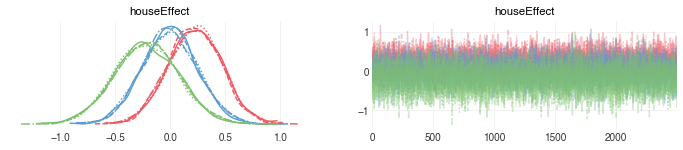

In [11]:
az.plot_trace(fit, var_names=['houseEffect'])

### Plot results

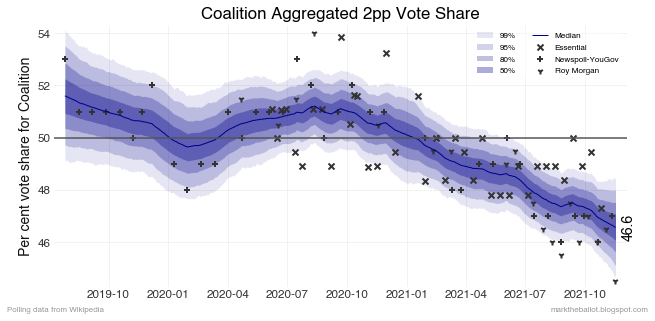

0
Essential          0.224559
Newspoll-YouGov   -0.005434
Roy Morgan        -0.217774
Name: 0.5, dtype: float64


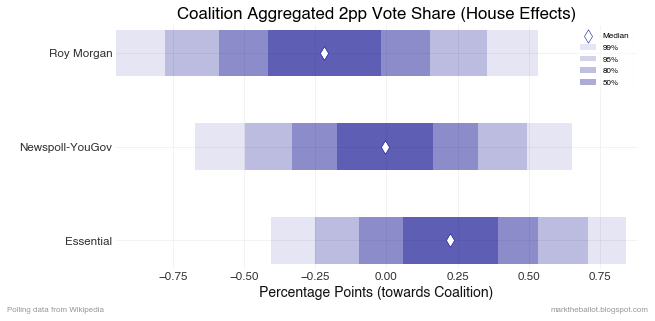

In [12]:
common.bayes_poll_aggregation_plots(df=tpp, 
                             fit=fit, 
                             first_day=first_day, 
                             brand_map=brand_map,
                              poll_column='2pp vote L/NP',
                              date_column='Mean Date',
                              firm_column='Brand',
                                 party='Coalition',
                                 title='Aggregated 2pp Vote Share',
                                 line_color='darkblue',
                                 point_color='dodgerblue',
                                 s_args=s_args)
